# Aspiration with ramp-hold, fitting to aspirated length 


## (1) Prescribed Pressure Profile

Pressure $P(t)$ is a ramp-and-hold shape. Below its definition and its derivative.

$$ 
P(t)=
\begin{cases}
 &Q\cdot t \quad \text{ for } t\le t_r \\
 &Q \cdot t_r \quad \text{for } t>t_r 
\end{cases} \qquad \Rightarrow \qquad
\frac{\mathrm{d} P(t)}{\mathrm{d} t}=
\begin{cases}
 &Q  \qquad \text{ for } t\le t_r \\
 &0 \qquad \text{ for } t>t_r 
\end{cases} 
$$

Where $t_r$ is the ramp time, and $Q$ is the rate of pressure change

## (2) Boltzmann Hereditary Integral, and the case of aspiration

Given an arbitrary stress profile $\sigma(t)$, we can calculate the resulting strain with the following:

$$
\varepsilon(t) =\int_{-\infty}^t J(t-\xi)\frac{\mathrm{d} \sigma(\xi)}{\mathrm{d} \xi} \mathrm{d} \xi
$$

Where $J(\xi)$ is the Creep Compliance function (assuming the material is non-ageing).

For an aspiration experiment, stress $\sigma(t) = P(t)$, and strain $\varepsilon(t) = -{L(t)} / {kR_c}$, where $R_c$is the channel radius and $k$ an adimensional constal (the wall function). 
The Boltzmann integral then becomes:

$$
L(t) = -k \ R_c \int_0^t J(t-\xi)\frac{\mathrm{d} P(\xi)}{\mathrm{d} \xi} \mathrm{d} \xi
$$

## (3) Creep Compliance function

We assume Power Law viscoelasticity. Below is its Creep Compliance Function:

$$
J(t) = A\  t^{\,\beta}
$$

Where $A$ and $\beta$ are the mechanical parameters 
*****

## Solving the integral

Given the pressure profile as prescribed above in (1), we can solve the Boltzmann integral in (2) with the Creep compliance function define in (3).

- During the ramp $t \le t_r$, the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}=Q$) and we can write the Boltzamm Integral for the Aspirated Lenght $L_1(t)$: 

$$
L_1(t) = -k \ R_c \int_0^t A \ (t-\xi)^\beta Q \mathrm{d} \xi = -k \ R_c \ A \ Q \cdot \left[  -\frac{(t-\xi)^{\beta+1}}{\beta+1} \right]^t_0 =  \\ k \ R_c \ A \ Q \cdot \frac{t^{\beta + 1}}{\beta+1}
$$

- And when $t > t_r$ (after the ramp ends), we split the integral of the aspirated length $L_2(t)$ into the interval of the ramp (where the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}=Q$), and into the hold one (where the derivative $\frac{\mathrm{d} P(t)}{\mathrm{d} t}= \emptyset$ so that the integral in that interval is zero). 

$$
L_2(t) = -k \ R_c \cdot \left[  \int_0^{t_r^-} A \ (t-\xi)^\beta Q \mathrm{d} \xi + \int_{t_r^+}^t A \ (t-\xi)^\beta \ \emptyset \  \mathrm{d} \xi \right] =\\ 
$$

$$
-k \ R_c \ A \ Q \cdot \left[  \int_0^{t_r} \ (t-\xi)^\beta  \ \mathrm{d} \xi \right] =
$$

$$
-k \ R_c \ A \ Q \cdot \frac{ t^{\beta+1} - (t-t_r)^{\beta+1} }{\beta+1}
$$


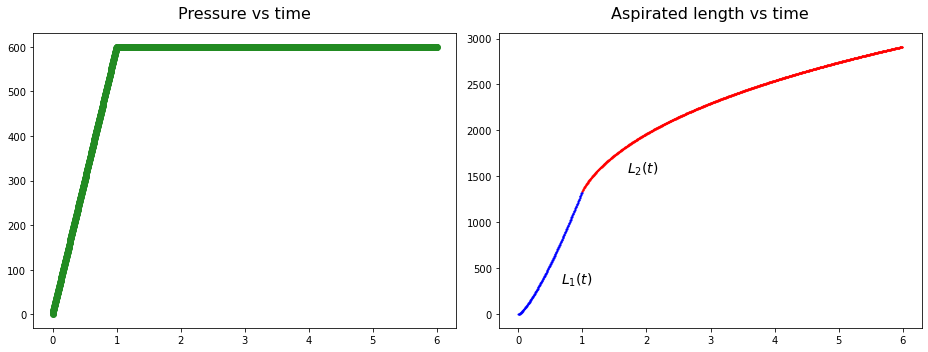

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import power as pow 

## Experiment parameters
tr = 1 # ramp time
k = 0.97 # wall function
Rc = 60 # microns
Q = 600 # cmH20/second

## Mechanical Model Parameters
A = 0.05
beta = 0.3

# Solution 
def L1(t):
    return k*Rc*A*Q* pow(t, beta+1) / (beta+1)

def L2(t):
    return (k*Rc*A*Q) * (pow(t,beta+1)-pow(t-tr, beta+1)) / (beta+1)

# defining the time intervals: t1 is the ramp and t2 the hold
t1 = np.arange(0,tr,0.005)
t2 = np.arange(tr,6,0.005)

fig,ax = plt.subplots(ncols=2, figsize=(13,5));
ax[0].set_title('Pressure vs time', fontsize=16, pad=15)
ax[0].scatter(t1, t1*Q, c = 'forestgreen')
ax[0].scatter(t2, [tr*Q]*len(t2), c = 'forestgreen')

ax[1].set_title('Aspirated length vs time', fontsize=16, pad=15)
ax[1].scatter(t1, L1(t1), c='b', s = 1);
ax[1].scatter(t2, L2(t2), c='r', s = 1);
ax[1].text(0.66*tr, 0.25*L1(tr), r"$L_1(t)$", fontsize = 14);
ax[1].text(1.7*tr, 1.15*L2(tr), r"$L_2(t)$", fontsize = 14);

plt.tight_layout()

# Issue

### During the ramp, the aspirated length $L_1(t)$ should have downward concavity, but it doesn't? Is it correct to expect a downward concavity? 

For example, in [Ramp-Creep Ultrasound Viscoelastography for Measuring Viscoelastic Parameters of Materials](https://www.mdpi.com/1996-1944/13/16/3593), even if they use an SLS model, the copied Figure below shows the *shape* I would expect:
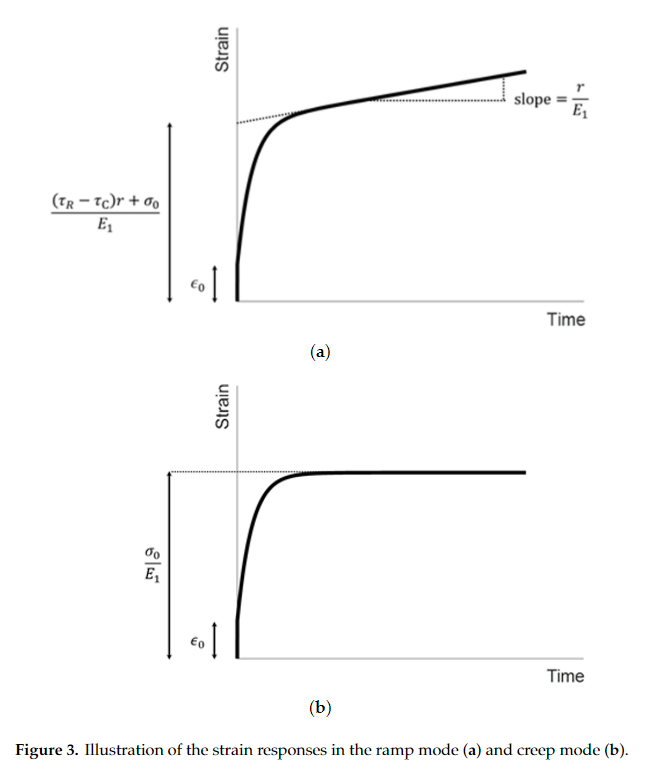